# How to begin Wrangling: Get to know your Data!

Whenever you begin working with a new dataset, it's essential that you get to know your data! To get started, there are a few questions to consider:

* Where did the data come from and how it was collected?

* What data types are my variables (numeric, string, date, etc)?

* Does Python recognize recognize these variables as their correct data types?

* Are there outliers in our data?

* How should we handle missing data?

The answers to these questions are just a handful of ways that may influence the approaches you take to wrangle your data. 

:::{note}
Data wrangling may also be referred to as **data cleaning**. By wrangling our data, we help ensure that it will be clean for later analysis.
:::

### Case Study of Data Wrangling

In this chapter, we will consider these questions as we get to know the [MIMIC-IV Dataset](https://physionet.org/content/mimiciv/3.1/) [^*] and demonstrate the steps needed to ensure that it can used for downstream analyses.

### Where did the data come from and how was it collected?

The MIMIC-IV dataset contains data from >220,000 patients who were admitted to Beth Israel Deaconess Medical Center in Boston, Massachusetts between 2008-2022. The dataset contains information that was entered into a patient's medical record during the time they were admitted to the hospital.

For this case study, we will rely on MIMIC's [demo-dataset](https://physionet.org/content/mimic-iv-demo/2.2/) [^**] which has been made publically available and contains the data from random subset of 100 hospitalized patients.

:::{note}
#### A note on the data used for this case study
Due to the sensitive nature of medical data, the full MIMIC-IV dataset requires special approval to work with. The demo-dataset has been specially prepared for educational purposes. Even though this is an abbreviated dataset, the amount of medical data is so voluminous, that we will only be using a subset of the demo-dataset for the purposes of this case study.

:::

### What does this data look like? 

The MIMIC-IV dataset contains many seperate data tables (structured as csv files). 

To begin, we will import just one of the csv files concerning the demographics of the patients included in study. We will use `pd.read_csv()` to import the data as a DataFrame.

In [7]:
import pandas as pd

patients = pd.read_csv('../../data/mimic_patients.csv')

#### Determine Data Types

Now that we've loaded in our data, we can start to explore what type of data we have. 

The use of the method `.head()` can be a good first choice to get a glimpse of the first few rows of the DataFrame.

We see that we have three columns: `subject_id` (unique patient identifier), `gender`, and `anchor_age` (age of patient).

In [9]:
patients.head()

subject_id gender  anchor_age
0    10014729      F          21
1    10003400      F          72
2    10002428      F          80
3    10032725      F          38
4    10027445      F          48

:::{note}
#### Side-Note: Data Dictionaries and Codebooks

The creators of MIMIC have curated excellent [documentation](https://mimic.mit.edu/docs/) detailing the process of data collection, dataset construction, and detailed information about what each column (i.e. variable) of the dataset represents.

As mentioned, at its core, the MIMIC dataset is built from the compilation of numerous tables (csv files), each containing different types of data.

When working with a new dataset, it's good practice to determine whether there is a data dictionary or codebook which might tell us what each variable represents and what data types they are. For example, we can find information about the patients table in the [documentation's patients table page](https://mimic.mit.edu/docs/iv/modules/hosp/patients/).

One useful fact we can learn about the patient's data is that if a patient's `anchor_age` is >89, the value becomes capped at 91. This is done to preserve patient confidentiality.

:::

Since `.head()` only showed us the first 5 rows of data, let's run some code to evaluate how many rows we have.

In [12]:
len(patients)

100

We should also check that `subject_id` is in fact unique - if it is, the number of unique values for `subject_id` should equal the number of rows in our dataframe.

In [14]:
patients['subject_id'].nunique()

100

In [15]:
# we could also automate this check
patients['subject_id'].nunique() == len(patients)

True

Next, we might want to check how Python interepreted these data types. 

In [17]:
patients.dtypes

subject_id     int64
gender        object
anchor_age     int64
dtype: object

Should `subject_id` really be considered an integer? We are informed from the dataset curators that this variable is a unique subject (or patient) identifier. 

Ask yourself: would adding two `subject_id` values make sense?

If this is a unique identifier, we can almost think of this variable representing a person's name. In this case, `subject_id` is a categorical variable.

Let's convert this column to a string to make sure we don't accidently try to include it as a variable in subsequent numerical computations.

In [19]:
# convert `subject_id` to a string
patients['subject_id'] = patients['subject_id'].astype('str')

# check that the data has been converted to type str successfully
patients.dtypes

subject_id    object
gender        object
anchor_age     int64
dtype: object

From this step, we also see that `gender` is of type object and `anchor_age` is of type integer. These seem reasonable!

### Examine the values and distributions of each variable

To understand our data even more, we can inspect the actual values of our variables. For example, what categorical label is the `gender` variable composed of?

In [22]:
patients['gender'].value_counts()

gender
M    57
F    43
Name: count, dtype: int64

For numerical variables, we can access the distribution of values by calculating summary statictics.

In [24]:
patients['anchor_age'].describe()

count    100.00000
mean      61.75000
std       16.16979
min       21.00000
25%       51.75000
50%       63.00000
75%       72.00000
max       91.00000
Name: anchor_age, dtype: float64

Patients in our data have a mean age of 61.8. The youngest and oldest patients are 21 and 91 years old, respectively. Recall from the documentation, all ages > 89 years old are capped at 91, so this is a nice sanity check that our maximum age is as expected.

Better yet, for a quick glance of the distribution, we can also use a histogram:

<Axes: >

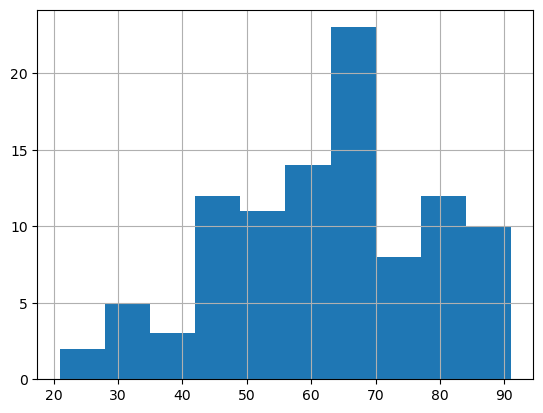

In [27]:
patients['anchor_age'].hist()

Checking the distribution of numerical values is important as it can help us quickly see if there is an unexpected observation in our data. For instance, perhaps we were told our dataset should only include adults, but we saw some ages that were < 10 years old. Or maybe someone is said to be 150 years old! These would necessitate further exploration to determine whether there are any data entry issues. Perhaps a busy doctor mistyped the age or maybe age was confused with a different variable.

### Incorporating more data!

As previously mentioned, MIMIC contains multiple tables worth of data. Next, let's look at a second file: `vitals.csv` which contains vital sign measurements for patients.

In [30]:
vitals = pd.read_csv('../../data/mimic_vitals.csv')

Let's repeat the previously described steps to help us get to know our new `vitals` DataFrame.

In [32]:
vitals.head()

subject_id   chartdate      result_name result_value
0    10011398  2146-12-01  Height (Inches)           63
1    10011398  2147-01-22     Weight (Lbs)          127
2    10011398  2146-12-01     Weight (Lbs)          135
3    10011398  2147-07-24     Weight (Lbs)          136
4    10011398  2147-03-26     Weight (Lbs)          136

Once again, we see that the `subject_id` column is present, in addition to three new columns named: `chartdate`, `result_name`, and `result_value`.

Let's see if the number of unique `subject_id`s match the number of rows:

In [34]:
vitals['subject_id'].nunique() == len(vitals)

False

In [35]:
len(vitals)

2964

In this case, it appears that there are many more observations in the `vitals` DataFrame (note: this was also apparent just from looking at the first 5 rows: the same `subject_id` appears in each row!). 

To get a better idea of what is going on here, we can examine the specific types of categories in the `result_name` column. When we do, we learn that this variable annotates vital sign measurements including weight, height, body mass index (BMI), and blood pressure. 

Since this dataset represents hospitalized patients, it is reasonable that each patient may have each vital measured several times throughout their hospital stay.

We can can confirm this by using `.groupby()` on the `subject_id` and `result_name` columns to see how many unique results (`result_value`) each patient had.

In [37]:
vitals.groupby(['subject_id', 'result_name'])[['result_value']].count()

result_value
subject_id result_name                  
10000032   BMI (kg/m2)                 8
           Blood Pressure              6
           Height (Inches)             2
           Weight (Lbs)               25
10001217   BMI (kg/m2)                 1
...                                  ...
10039997   Weight (Lbs)                5
10040025   BMI (kg/m2)                10
           Blood Pressure              1
           Height (Inches)             1
           Weight (Lbs)               10

[268 rows x 1 columns]

As we did before, let's also check the data types:

In [39]:
vitals.dtypes

subject_id       int64
chartdate       object
result_name     object
result_value    object
dtype: object

First, we can convert `subject_id` to a string again

In [41]:
vitals['subject_id'] = vitals['subject_id'].astype('str')

#### Working with Dates

Next, we see that `chartdate` is an object. We can convert dates to a special **datetime** data type in Python. This specification will allow us to perform operations between dates (e.g., finding the number of days between two blood pressure measurements).

In [43]:
vitals['chartdate'] = pd.to_datetime(vitals['chartdate'])
print(vitals.dtypes)
vitals.head()

subject_id              object
chartdate       datetime64[ns]
result_name             object
result_value            object
dtype: object


subject_id  chartdate      result_name result_value
0   10011398 2146-12-01  Height (Inches)           63
1   10011398 2147-01-22     Weight (Lbs)          127
2   10011398 2146-12-01     Weight (Lbs)          135
3   10011398 2147-07-24     Weight (Lbs)          136
4   10011398 2147-03-26     Weight (Lbs)          136

:::{note}
#### Important Note about Dates

`chartdate` is the date the vital sign was recorded. You'll notice that these years are in the future. **Data shifting** was performed to add an additional measure of privacy (as you may recall from #pillar-2-data-privacy). To protect the sensitive data of patients, dates were shifted up randomly for each patient, but in a consistent way (consistent shifting meaning if two blood presure measurements were taken on two back-to-back days, the shifted dates might look like: 2067-01-01 and 2067-01-02). Knowing whether or not a dataset's dates are accurate or have been shifted is crucial if you're trying to draw conclusions that are based on the actual date. For example, let's say a patient was admitted with an unknown but severe respiratory infection in 1990, but had their dates shifted to 2020 - it would be completely erroneous to conclude they may have had COVID-19 (considering COVID-19 did not even exist in the 1990s!).

:::

Now that `chartdate` has been converted to a datetime object, we can perform date-specific types of operations. 

For instance, for each patient, let's order rows in chronological order. 

In [46]:
vitals_sorted = vitals.sort_values(by=['subject_id', 'chartdate'], ascending=[True, True])
vitals_sorted.head(10)

subject_id  chartdate      result_name result_value
1204   10000032 2180-04-27     Weight (Lbs)           94
1241   10000032 2180-04-27   Blood Pressure       110/65
1203   10000032 2180-05-07  Height (Inches)           60
1207   10000032 2180-05-07      BMI (kg/m2)         18.0
1218   10000032 2180-05-07     Weight (Lbs)        92.15
1219   10000032 2180-05-07     Weight (Lbs)        92.15
1220   10000032 2180-05-07     Weight (Lbs)        92.15
1221   10000032 2180-05-07     Weight (Lbs)        92.15
1222   10000032 2180-05-07     Weight (Lbs)        92.15
1223   10000032 2180-05-07     Weight (Lbs)        92.15

We can also calculate the difference in dates between a patient's earliest measurement and most recent measurement. We can do this by first aggregating the min and max days using `.agg()` method and then calculating the difference in the number of days between the max and min dates by using Pandas `.dt.days` attribute.

In [48]:
date_range = vitals_sorted.groupby('subject_id')['chartdate'].agg(['min', 'max'])
date_range['day_diff'] = (date_range['max'] - date_range['min']).dt.days
date_range.sort_values('day_diff', ascending = True)

min        max  day_diff
subject_id                                
10023771   2113-09-27 2113-09-27         0
10015272   2137-06-15 2137-06-15         0
10010471   2155-05-08 2155-05-08         0
10009628   2153-10-21 2153-10-21         0
10009049   2174-07-20 2174-07-20         0
...               ...        ...       ...
10020306   2128-11-28 2135-08-20      2456
10004457   2141-10-30 2149-01-19      2638
10019003   2148-08-25 2155-11-23      2646
10015860   2186-10-14 2194-03-29      2723
10037928   2175-03-16 2183-12-25      3206

[79 rows x 3 columns]

Just from this sample we can see that some patients have years between measurements. This is reasonable since patients in MIMIC can be hospitalized more than once.

Other ways we could work with the datetime objects are by separating out the year, month, and day.

For example, if we wanted to create unique columns for year, month, and day, we could do the following:

In [51]:
vitals_sorted['year'] = vitals_sorted['chartdate'].dt.year
vitals_sorted['month'] = vitals_sorted['chartdate'].dt.month
vitals_sorted['day'] = vitals_sorted['chartdate'].dt.day

vitals_sorted

subject_id  chartdate      result_name result_value  year  month  day
1204   10000032 2180-04-27     Weight (Lbs)           94  2180      4   27
1241   10000032 2180-04-27   Blood Pressure       110/65  2180      4   27
1203   10000032 2180-05-07  Height (Inches)           60  2180      5    7
1207   10000032 2180-05-07      BMI (kg/m2)         18.0  2180      5    7
1218   10000032 2180-05-07     Weight (Lbs)        92.15  2180      5    7
...         ...        ...              ...          ...   ...    ...  ...
2689   10040025 2147-12-29     Weight (Lbs)          212  2147     12   29
2696   10040025 2147-12-29      BMI (kg/m2)         34.2  2147     12   29
2692   10040025 2147-12-30      BMI (kg/m2)         30.3  2147     12   30
2704   10040025 2147-12-30     Weight (Lbs)       187.61  2147     12   30
2703   10040025 2148-01-19   Blood Pressure       112/60  2148      1   19

[2964 rows x 7 columns]

#### Data Wrangling Strings to Numbers

You may have noticed that `result_name` was not being recognized as a numerical variable. Perhaps there are non-numeric values in this column? We can check this using the following expression to see which observations have non-numeric characters: 

In [53]:
# return the rows where there are non-numeric characters in `result_value`
vitals[vitals['result_value'].astype(str).str.contains(r'[^0-9]')][['result_name', 'result_value']].drop_duplicates()

result_name result_value
8         BMI (kg/m2)         23.6
9         BMI (kg/m2)         23.9
10        BMI (kg/m2)         25.3
12        BMI (kg/m2)         25.8
13    Height (Inches)         61.5
...               ...          ...
2957   Blood Pressure       152/94
2958   Blood Pressure       153/94
2961   Blood Pressure       111/72
2962   Blood Pressure       135/76
2963     Weight (Lbs)       252.65

[1282 rows x 2 columns]

You'll notice in some cases that when `result_name == Blood Pressure`, the results contain a '/' to separate systolic from diastolic blood pressure.

If we were interested in investigating blood pressure of these patients, we'd need to be mindful that Python will not allow us to simply average blood pressure without doing further data wrangling to separate these numbers from the non-numerical character. 

In [55]:
# create blood pressure dataframe
bp_measurements = vitals.copy()

bp_measurements = bp_measurements[bp_measurements['result_name'] == 'Blood Pressure']
bp_measurements.head()

subject_id  chartdate     result_name result_value
14   10011398 2146-12-01  Blood Pressure       110/70
15   10011398 2147-03-26  Blood Pressure       112/80
16   10011398 2146-06-02  Blood Pressure       128/84
17   10011398 2147-07-24  Blood Pressure       132/84
18   10011398 2146-05-28  Blood Pressure       138/90

In the code below, we can use `str.split()` to help us separate systolic (number before `/`) and diastolic (number after `/`) blood pressure. Once we remove the `/`, we can also convert our new columns to integers.

In [94]:
bp_measurements[['systolic', 'diastolic']] = bp_measurements['result_value'].str.split('/', expand=True).astype(int)
print(bp_measurements.dtypes)
bp_measurements.head()

subject_id              object
chartdate       datetime64[ns]
result_name             object
result_value            object
systolic                 int64
diastolic                int64
dtype: object


subject_id  chartdate     result_name result_value  systolic  diastolic
14   10011398 2146-12-01  Blood Pressure       110/70       110         70
15   10011398 2147-03-26  Blood Pressure       112/80       112         80
16   10011398 2146-06-02  Blood Pressure       128/84       128         84
17   10011398 2147-07-24  Blood Pressure       132/84       132         84
18   10011398 2146-05-28  Blood Pressure       138/90       138         90

#### Examine distribution of continous variables

Let's explore the distribution of our now cleaned `systolic` and `diastolic` variables

<Axes: >

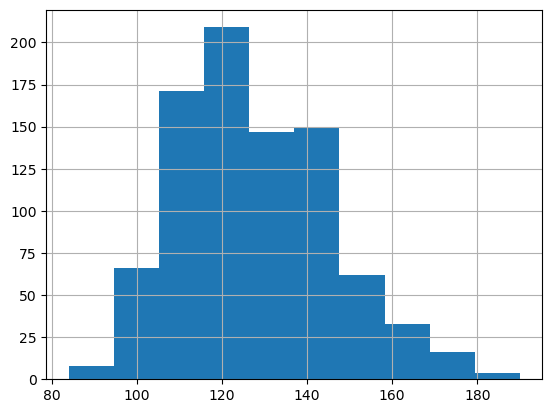

In [96]:
bp_measurements['systolic'].hist()

<Axes: >

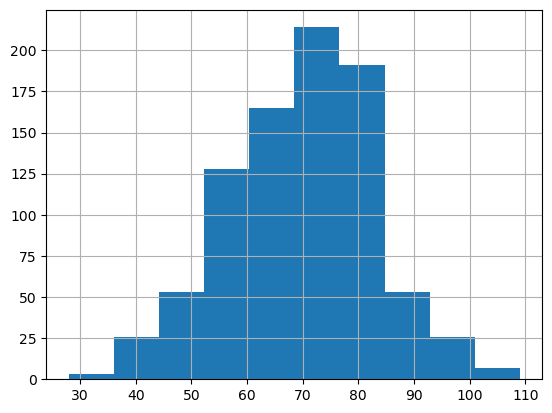

In [98]:
bp_measurements['diastolic'].hist()

From these distributions, there does not appear to be any extreme outliers. However, if our primary analysis was to focus on blood pressure, we would likely want to consult a medical **domain expert** to ensure this distribution seems reasonable. Importantly, we would want to consider whether the the systolic and diastolic blood pressure values we see at either end of the distributions are biologically plausible.

:::{note}
We refer to domain experts as those who have specialized knowledge in a field (i.e. domain) of interest. For example, domain experts might include medical doctors, physicists, CEOS, lawyers, etc. Often, domain experts might not know how to code or analyze data. However, domain experts can help clarify how the data was collected and what each variable means in the context of the particular domain. This can help ensure robust data wrangling.
:::

### Filtering Observations of Interest

Perhaps we are only interested in subjects who have height and weight measurements. We can create a new copy of the vitals dataframe and filter it to keep those observations of interest.

Note, from the `result_name` we see that height and weight are said to be recorded in inches and pounds (lbs), respectively. 

In [103]:
height = vitals.copy()
height = height[height['result_name'] == 'Height (Inches)']

weight = vitals.copy()
weight = weight[weight['result_name'] == 'Weight (Lbs)']

#### Evaluate height

In [105]:
height.head()

subject_id  chartdate      result_name result_value
0    10011398 2146-12-01  Height (Inches)           63
13   10011398 2147-01-22  Height (Inches)         61.5
20   10014729 2125-02-22  Height (Inches)           65
21   10014729 2125-04-05  Height (Inches)           66
22   10014729 2126-01-24  Height (Inches)           66

First, let's make sure that Python recognizes height as a continuous variable. If it's not, we will convert it to type numeric.

In [107]:
# check variable data types
height.dtypes

subject_id              object
chartdate       datetime64[ns]
result_name             object
result_value            object
dtype: object

In [109]:
height['result_value'] = pd.to_numeric(height['result_value'])

#### Identify the presence of outliers 

As mentioned in an earlier chapter, outliers refer to observations that appear abnormal. Outliers may arise due to data-entry errors or, in this case, mistakes made during the actual vital sign measurements. It's important to identify and investigate outliers so as to decide how we should handle them (if at all).

Visualing the distribution of a continous variable can help identify whether there are potential outliers. We can also use Pandas `.describe()` method to quickly calculate summary statistics.

<Axes: >

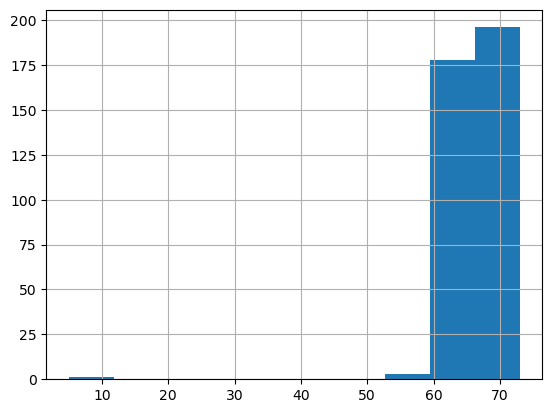

In [112]:
height['result_value'].hist()

In [114]:
# use describe() to compute summary statistics of the distribution
height['result_value'].describe()

count    378.000000
mean      67.105952
std        5.117295
min        5.000000
25%       63.500000
50%       67.000000
75%       71.000000
max       73.000000
Name: result_value, dtype: float64

**Potential red flag:** Is there really a patient who might be 5 inches tall? This is clearly a case we should investigate more. 

First, we can sort the height values from lowest to highest in order to retrieve the `subject_id` of the patient who is said to have a height of 5 inches.

Sorting will also help us see whether there are any other patients with unusually low heights

In [117]:
height.sort_values(['result_value']).head()

subject_id  chartdate      result_name  result_value
1844   10012853 2175-04-05  Height (Inches)           5.0
2883   10002428 2154-10-18  Height (Inches)          58.0
2885   10002428 2155-08-12  Height (Inches)          59.0
2884   10002428 2158-09-13  Height (Inches)          59.0
1262   10037928 2175-12-06  Height (Inches)          60.0

Let's see if this patient has other recorded height measurements

In [119]:
height[height['subject_id']=='10012853']

subject_id  chartdate      result_name  result_value
1844   10012853 2175-04-05  Height (Inches)           5.0
1845   10012853 2178-11-04  Height (Inches)          64.0
1846   10012853 2176-06-07  Height (Inches)          64.0
1847   10012853 2177-01-05  Height (Inches)          64.0

Interesting, it appears this patient had an initial obsevation of 5 inches, but then three years later was always measured at 64 inches (or 5'4 in feet/inches). It seems even further unlikely that a person would have that dramatic of a growth in such a short timespan. But, let's investigate the variation in change for other patients who have more than one height measurement.

For each unique patient with multiple observations, we will calculate the standard deviation of each patient's height measurements.

*Note*: `ddof = 0` indicates that std for patients with one measurement will be displayed as 0 rather than NaN

In [164]:
import numpy as np

height['std'] = height.groupby('subject_id')['result_value'].transform('std', ddof=0)

In [132]:
height.sort_values('std', ascending = False)[['subject_id', 'std']].drop_duplicates().head(10)

subject_id        std
1844   10012853  25.547749
1102   10005909   2.724312
462    10019917   1.000000
2720   10022880   0.942809
182    10001725   0.862706
13     10011398   0.750000
1266   10037928   0.745356
2730   10004457   0.731247
2883   10002428   0.707107
524    10005348   0.596212

It is obvious that our 'concerning' patient has a much higher standard deviation of their height measurements compared to other patients.

Let's take a look at the two patients with the second and third highest standard deviation for comparison

In [134]:
height[height['subject_id']=='10005909']

subject_id  chartdate      result_name  result_value       std
1094   10005909 2144-10-29  Height (Inches)          65.0  2.724312
1095   10005909 2144-12-10  Height (Inches)          70.0  2.724312
1096   10005909 2145-01-03  Height (Inches)          70.0  2.724312
1102   10005909 2144-11-15  Height (Inches)          72.5  2.724312

In [136]:
height[height['subject_id']=='10019917']

subject_id  chartdate      result_name  result_value  std
461   10019917 2182-02-14  Height (Inches)          69.0  1.0
462   10019917 2182-01-09  Height (Inches)          71.0  1.0

It clearly seems that there the 5 inch observation is an outlier. Perhaps whoever recorded the data mistook the variable for feet instead of inches?

The best way to handle these types of inconsistencies will largely depend on the exact variable, research question of interest, and domain knowledge. In this case, it may be safe to take the median (64 years) for the concerning observation since this was a consistent height recorded over the following years. However, there are a couple of ways to best handle apparent outliers:

* Seek consultation from mentors and domain experts! 

* Consider the age of the patient - height may be expected to change more dramatically over time for some patients rather than others. Depending on the patient's age, it may be fair to take the next measurement that occured closest in time to the date of the suspect measurement.

#### Handling multiple observations

Despite the considerations metioned, let's demonstrate how to groupby `subject_id` and take the median height for patients with multiple measurements.

In [140]:
# create a new variable with the median height value for each patient
height['result_value_median'] = height.groupby('subject_id')['result_value'].transform('median')

This next step ensures that we will now only have one unique row per patient.

In [142]:
# assuming we don't need to link by date
height_clean = height[['subject_id', 'result_name', 'result_value_median']].drop_duplicates()

In [144]:
# should have one observation per person
len(height_clean)

61

Let's review the distribution again - now it looks a bit more normally distributed

<Axes: >

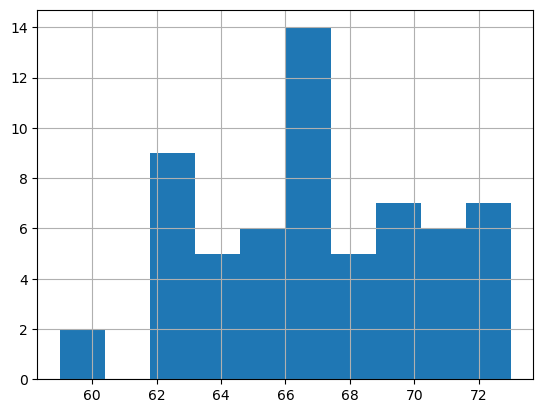

In [146]:
height_clean['result_value_median'].hist()

### Unit Conversion Issues

Another important consideration when wrangling our data involves unit conversions. Errors involving unit conversions may show up as outliers.

Let's next examine weight measurements.

In [149]:
### pre-process the data
weight['result_value'] = pd.to_numeric(weight['result_value'])

# calculate summary statistics
weight['result_value'].describe()

count    941.000000
mean     173.202763
std       44.009522
min       88.000000
25%      147.300000
50%      169.310000
75%      185.000000
max      296.000000
Name: result_value, dtype: float64

<Axes: >

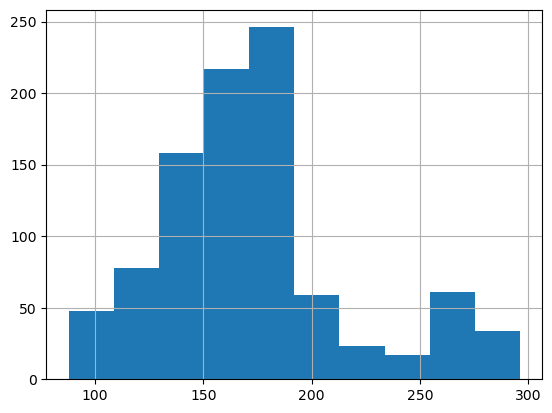

In [151]:
weight['result_value'].hist()

#### Investigate the variance in measurements between patients with multiple observations

As we did with height, let's calculate the standard deviation of weight measurements for patients with multiple weights recorded 

In [158]:
weight['std'] = weight.groupby('subject_id')['result_value'].transform('std', ddof=0)# ddof = 0 indicates that std for patients with one measurement will be displayed as 0 rather than NaN

In [166]:
weight.sort_values('std', ascending = False)[['subject_id', 'std']].drop_duplicates().head(5)

subject_id        std
179    10019385  58.385000
638    10021487  22.758934
2134   10019003  19.732249
1184   10039708  19.442869
2705   10040025  16.104849

Let's examine the first patient who's weight measurements have a std of 58.4. 

When we look at this patient's measurements, we may notice that they appear to have lost >110 pounds in < 1 month. Is this likely?

In [168]:
weight[weight['subject_id']=='10019385'].sort_values('chartdate')

subject_id  chartdate   result_name  result_value     std
179   10019385 2180-02-15  Weight (Lbs)        214.07  58.385
177   10019385 2180-03-04  Weight (Lbs)         97.30  58.385

A unit conversion error may be a possibility here.

If we do the math, 1 pound ~ 0.45 kg. 

If 214.07 is the weight in pounds, the equivalent weight in kilograms is 214.07*0.45 = ~96kg. These weight measurements made one month apart seem very close if we consider that there may be a unit conversion issue. 

Let's examine the second patient we observe having a high standard deviation as regards their weight measurements. 

If we look at the measurements sorted chronologically, it looks like this second patient iteratively lost weight over the course of about 6 months before the weight began to increase again. This may be likely if the patient was sick and hospitalized for a long time and then began to recover and regain some of their weight.

In [172]:
weight[weight['subject_id']=='10021487'].sort_values('chartdate')

subject_id  chartdate   result_name  result_value        std
644   10021487 2117-01-14  Weight (Lbs)         264.0  22.758934
643   10021487 2117-01-19  Weight (Lbs)         254.0  22.758934
641   10021487 2117-02-10  Weight (Lbs)         227.0  22.758934
638   10021487 2117-05-05  Weight (Lbs)         204.0  22.758934
635   10021487 2117-06-16  Weight (Lbs)         193.0  22.758934
656   10021487 2117-07-07  Weight (Lbs)         196.6  22.758934
636   10021487 2117-08-18  Weight (Lbs)         199.0  22.758934
637   10021487 2117-08-18  Weight (Lbs)         199.0  22.758934
639   10021487 2117-09-09  Weight (Lbs)         208.0  22.758934
657   10021487 2117-12-03  Weight (Lbs)         210.1  22.758934
640   10021487 2118-01-24  Weight (Lbs)         212.0  22.758934
642   10021487 2118-08-01  Weight (Lbs)         241.0  22.758934

While it may seem tedious, it is good practice to get in the habit of really getting to know your data. When specific observations jump out as being suspicious, you can perform case studies focused on particular patients to have a better sense of their data. In the case of the patient with rapid weight loss and regain, it may be helpful to referenmce additional data tables to have a more holistic view of this patient's time in the hospital.

### Non-standardized labels

Next, we will use a third MIMIC table: `labs.csv` to demonstrate measurements that have slightly different label names.

In this modified labs data, we have different types of hemoglobin and heparin laboratory (blood test) measurements (as noted in the `label` column).

In [177]:
labs = pd.read_csv('../../data/mimic_labs.csv')
labs.head()

subject_id       label value valueuom
0    10000032  Hemoglobin  11.9     g/dL
1    10000032        MCHC  34.5        %
2    10001217  Hemoglobin  11.8     g/dL
3    10001217        MCHC  34.4        %
4    10001217        MCHC  32.4        %

Let's take a look at the number of unique ways these labs may be represented. If we are not domain experts, we might not know whether there are differences in these blood tests. 

For instance, if we are interested in examining hemoglobin levels, we could search the `labs` DataFrame for the string hemoglobin. When we do so, we'll notice that there are many different variations of labs with "hemoglobin" in the name. Are all these the same? Sometimes the units (`valueuom`) can help us determine this. Othertimes, we may need to compare distributions or consult domain experts as to which are the proper variables to include.

In [180]:
labs[labs['label'].str.contains('hemoglobin', case = False)][['label', 'valueuom']].value_counts()

label              valueuom
Hemoglobin         g/dL        159
% Hemoglobin A1c   %            49
Carboxyhemoglobin  %             7
Methemoglobin      %             6
Hemoglobin C       %             1
Name: count, dtype: int64

Let's compare the distributions of the measurements labeled `Hemoglobin` (measured in `g/dL`) and `% Hemoglobin A1c`. Although the units different, the distributions seem fairly similar. This may warrent clinical domain expertise to review and confirm whether these lab measurements can combined.

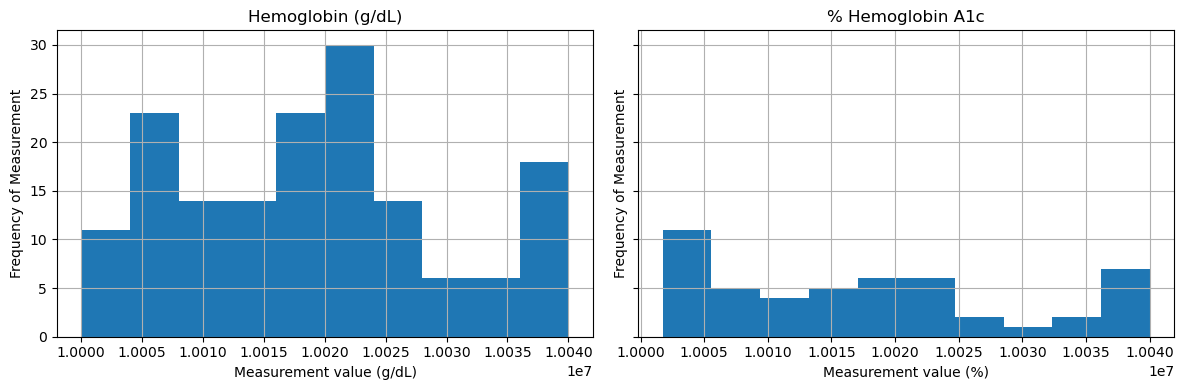

In [212]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

labs[labs['label'] == 'Hemoglobin'].hist(ax=axes[0])
axes[0].set_title('Hemoglobin (g/dL)')
axes[0].set_ylabel('Frequency of Measurement')
axes[0].set_xlabel('Measurement value (g/dL)')

labs[labs['label'] == '% Hemoglobin A1c'].hist(ax=axes[1])
axes[1].set_title('% Hemoglobin A1c')
axes[1].set_ylabel('Frequency of Measurement')
axes[1].set_xlabel('Measurement value (%)')

plt.tight_layout()
plt.show()

## Missing Data

Data wrangling is also necessary in the case of missing data.

There are many reasons for that data may be missing, and a full review of these is out of the scope of this textbook. However, common reasons for missing data include:

- Data entry problems
- Measurement was not recorded due to negligence or perhaps there is a reason the measurement wasn't needed

Some common ways to handle missing data:

* Remove those measurements 
* Impute the missing value using the mean or median
* Forward/backward filling

Rule of thumb: Talk to your domain experts/collaborators!

Let's examine a simple, one patient case, for how we might work with missing blood pressure measurements. The following patient has multiple blood pressure measurements recorded.

In [289]:
bp_test = bp_measurements[bp_measurements['subject_id']=='10035631'][['chartdate', 'systolic']].sort_values('chartdate')

Let's focus on a few time points when the patient had multiple measurements taken sequentially except for one day (2116-02-23).

In [291]:
bp_test = bp_test[(bp_test['chartdate'] >= '2116-02-16') & (bp_test['chartdate'] <='2116-02-24')]
bp_test

chartdate  systolic
1826 2116-02-16       125
1760 2116-02-17       106
1777 2116-02-18       110
1796 2116-02-19       115
1748 2116-02-20       103
1785 2116-02-21       111
1799 2116-02-22       116
1753 2116-02-24       104

### How might we handle missing values in this case?


One common way to handle missing values is to **impute** the missing value. Imputation refers to the process of filling in missing values. A simple method of imputation might include using the mean or the median value of a series of measurements in place of the missing value.

In this case, let's demonstrate how we might use median imputation to replace the missing value. 

First, in this case, we can see that there is not a row for 2116-02-23. Let's use `date_range()` to create a complete series of dates. We can then re-index the original data so that we have a series of sequential dates.

In [293]:
full_range = pd.date_range(
    start='2116-02-16',
    end='2116-02-24',
    freq='D'
)
full_range

DatetimeIndex(['2116-02-16', '2116-02-17', '2116-02-18', '2116-02-19',
               '2116-02-20', '2116-02-21', '2116-02-22', '2116-02-23',
               '2116-02-24'],
              dtype='datetime64[ns]', freq='D')

In [295]:
# Reindex 
bp_test = (
    bp_test
    .set_index('chartdate')
    .reindex(full_range)
)

bp_test

systolic
2116-02-16     125.0
2116-02-17     106.0
2116-02-18     110.0
2116-02-19     115.0
2116-02-20     103.0
2116-02-21     111.0
2116-02-22     116.0
2116-02-23       NaN
2116-02-24     104.0

After re-indexing, we have a complete set of dates. You will notice that there is a NaN next to the date that was originally missing a measurement. Next, we can use `fillna()` to replace the missing value by the median of the entire series.

In [299]:
# Impute the missing value with the median
bp_test_median = bp_test.fillna(bp_test.median())

# reset index to add `chartdate` as its own column
bp_test_median = bp_test_median.reset_index().rename(columns={'index': 'chartdate'})

bp_test_median

chartdate  systolic
0 2116-02-16     125.0
1 2116-02-17     106.0
2 2116-02-18     110.0
3 2116-02-19     115.0
4 2116-02-20     103.0
5 2116-02-21     111.0
6 2116-02-22     116.0
7 2116-02-23     110.5
8 2116-02-24     104.0

We could also impute by **forward filling**, which is an imputation technique referring to when the last observation is carried forward to replace a missing value. 

In [308]:
# Impute the missing value with the median
bp_test_forward = bp_test.ffill()

# reset index to add `chartdate` as its own column
bp_test_forward = bp_test_forward.reset_index().rename(columns={'index': 'chartdate'})

bp_test_forward

chartdate  systolic
0 2116-02-16     125.0
1 2116-02-17     106.0
2 2116-02-18     110.0
3 2116-02-19     115.0
4 2116-02-20     103.0
5 2116-02-21     111.0
6 2116-02-22     116.0
7 2116-02-23     116.0
8 2116-02-24     104.0

:::{warning}
It's always important to think critically about the best ways to impute any missing data. We demonstrated two simple methods (median/mean imputation and forward filling), but there are entire books written on different imputation techniques. As mentioned throughout this chapter, discussions with your collaboraters and domain experts are important for identifying the best imputation method. 

If imputation is used, it's important to be careful that methods we used are not biased. For example, mean imputation may not be preferred if the data is highly skewed. 

Another imputation method called backward filling refers to when a missing value is replaced by carrying the next observation backwards. As you can imagine, this can be problematic in cases when we are trying to time series data to predict some future outcome. We may be making our task much easier owing to data leakage, as you learned in the chapter on feature engineering.
:::

## Conclusions

This chapter aimed to provide you with a real-world dataset that benefited from data wrangling. As you can see, the process of data wrangling is highly dependent on your dataset. In many cases, there is also not one correct way to go about these processes. What's important is to deeply consider what our data represents, how it's structured, and the downstream implications for our analysis if we do or do not prepare our data appropriately. Data wrangling is also a great opportunity to work deeply with your collaborators (domain experts!) to ensure each step of the process is grounded in practical utility and is reflective of how the data was generated, collected, and how it's meant to be analyzed.


[^*] Johnson, A., Bulgarelli, L., Pollard, T., Gow, B., Moody, B., Horng, S., Celi, L. A., & Mark, R. (2024). MIMIC-IV (version 3.1). PhysioNet. RRID:SCR_007345. https://doi.org/10.13026/kpb9-mt58

[^**] Johnson, A., Bulgarelli, L., Pollard, T., Horng, S., Celi, L. A., & Mark, R. (2023). MIMIC-IV Clinical Database Demo (version 2.2). PhysioNet. RRID:SCR_007345. https://doi.org/10.13026/dp1f-ex47